## 1 - Libraries

In [47]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, InputLayer, Reshape
from tensorflow.keras.models import load_model

## 2 - Loading dataset

In [2]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
print('train data shape : ', train_images.shape)
print('test data shape : ', test_images.shape)

train data shape :  (60000, 28, 28)
test data shape :  (10000, 28, 28)


## 3 - Visualize the data

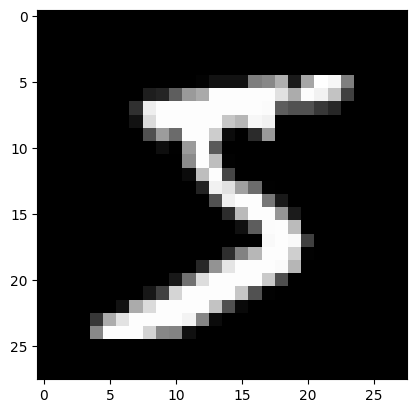

In [7]:
plt.imshow(train_images[0], cmap = "gray");

In [15]:
liste = []
for i in range(12):
    liste.append(np.random.randint(1, 60000))

In [16]:
liste

[37779,
 18158,
 37519,
 1870,
 48596,
 41126,
 17915,
 1065,
 16927,
 31741,
 1529,
 34614]

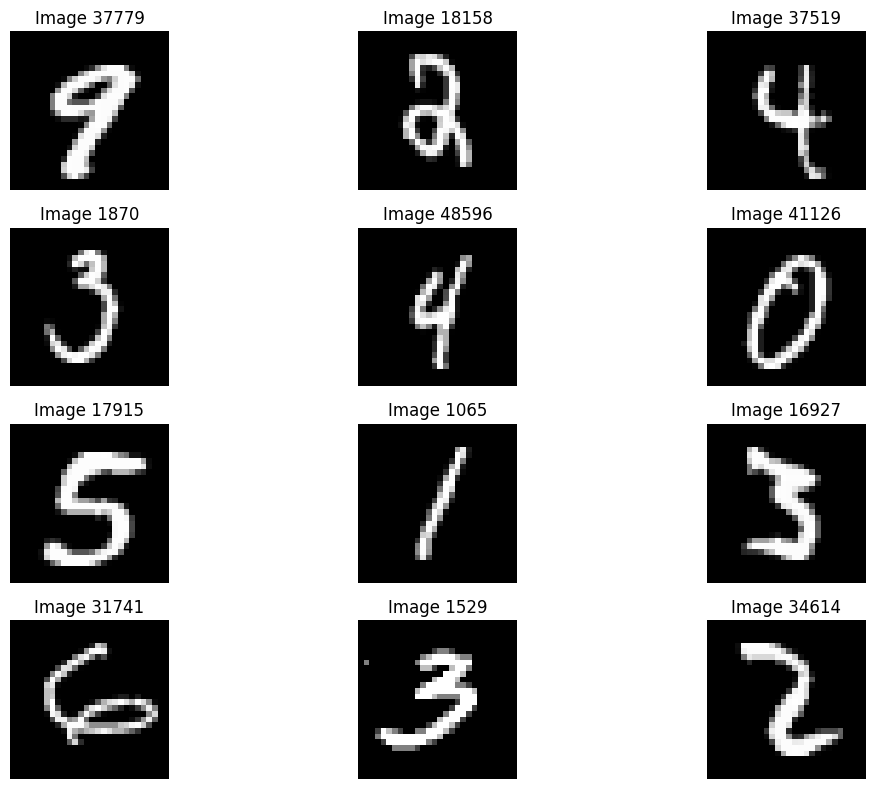

In [21]:
fig, axs = plt.subplots(4, 3, figsize=(12, 8))

# Flatten the axs array to easily iterate over the subplots
axs = axs.flatten()

# Loop over each index in the list
for i, ax in zip(liste, axs):
    ax.imshow(train_images[i], cmap='gray')
    ax.axis('off')  # Turn off axis labels
    ax.set_title(f'Image {i}')  # Set title for each subplot

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

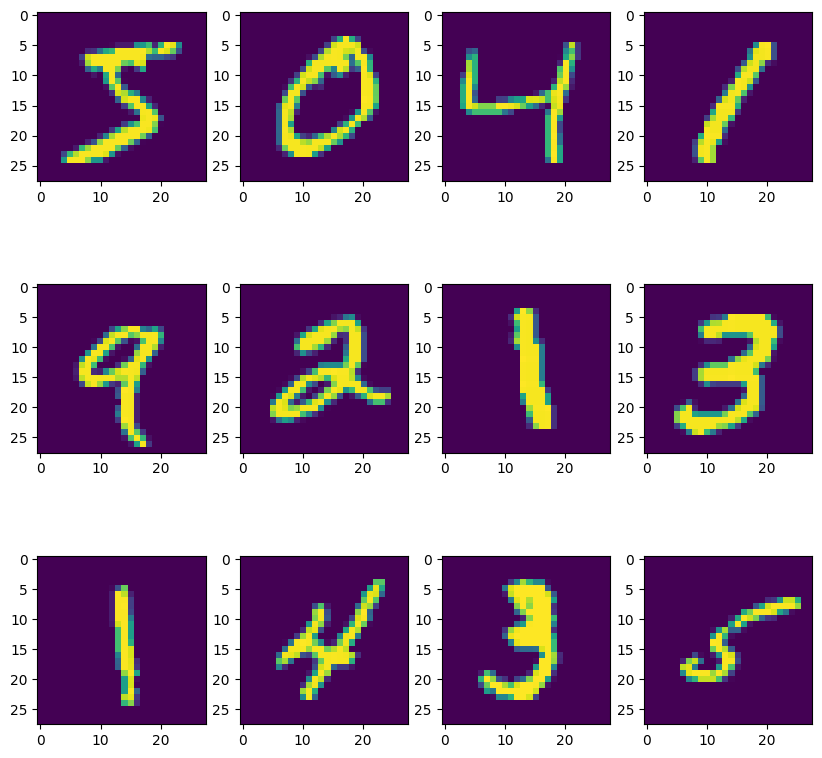

In [20]:
plt.figure(figsize = (10, 10))
x, y = 3, 4

for i,j in range(12):
    plt.subplot(x, y, i + 1)
    plt.imshow(train_images[i])
plt.show()

## 4 - Standardize of data

In [22]:
train_images = train_images / 255.0 #rgb renk modelinde degerler 0 ile 255 arasında deger alır.
test_images = test_images / 255.0

## 5 - Training the model

In [24]:
model = Sequential()

model.add(InputLayer(input_shape=(28, 28)))
model.add(Reshape(target_shape=(28, 28, 1)))
model.add(Conv2D(filters = 12, kernel_size = (3, 3), activation = 'relu'))  ## CNN
model.add(MaxPooling2D(pool_size = (2, 2)))   # Max Pooling CNN
model.add(Flatten())
model.add(Dense(10))  # on farklı sonuc var

model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), optimizer = 'adam',
              metrics = 'accuracy')

In [25]:
history = model.fit(train_images, train_labels, epochs = 10, validation_data = (test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.2909 - accuracy: 0.9190 - val_loss: 0.1407 - val_accuracy: 0.9609
Epoch 2/10
1875/1875 [==============================] - 22s 11ms/step - loss: 0.1235 - accuracy: 0.9656 - val_loss: 0.0963 - val_accuracy: 0.9708
Epoch 3/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0886 - accuracy: 0.9754 - val_loss: 0.0806 - val_accuracy: 0.9748
Epoch 4/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0729 - accuracy: 0.9788 - val_loss: 0.0712 - val_accuracy: 0.9785
Epoch 5/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0624 - accuracy: 0.9820 - val_loss: 0.0626 - val_accuracy: 0.9800
Epoch 6/10
1875/1875 [==============================] - 20s 10ms/step - loss: 0.0553 - accuracy: 0.9836 - val_loss: 0.0660 - val_accuracy: 0.9789
Epoch 7/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0496 - accuracy: 0.9851 - val_loss: 0.0598 -

## 6 - Result of training

In [26]:
_, accuracy = model.evaluate(test_images, test_labels)

313/313 [==============================] - 3s 9ms/step - loss: 0.0564 - accuracy: 0.9817


In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape (Reshape)           (None, 28, 28, 1)         0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 12)        120       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 12)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 2028)              0         
                                                                 
 dense (Dense)               (None, 10)                20290     
                                                                 
Total params: 20410 (79.73 KB)
Trainable params: 20410 (79.73 KB)
Non-trainable params: 0 (0.00 Byte)
____________________

In [29]:
score = model.evaluate(test_images, test_labels, verbose = 0)
print('Test Loss : ', score[0])
print('Test Accuracy : ', score[1] * 100)

Test Loss :  0.05644379183650017
Test Accuracy :  98.17000031471252


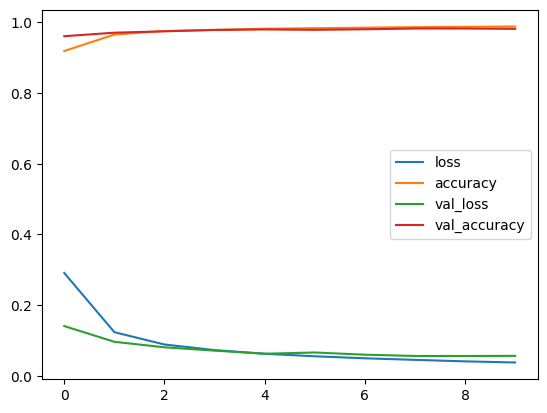

In [33]:
loss = pd.DataFrame(history.history)
loss.plot();

## 7 - Testing

In [34]:
test_image = test_images[35]
test_image = np.expand_dims(test_image, axis = 0)
test_image

array([[[0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.

In [35]:
test_labels[35]

2

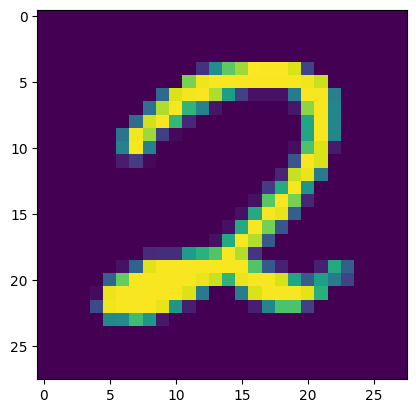

In [36]:
plt.imshow(test_image.reshape(28, 28));

In [37]:
test_data = test_images[35].reshape(1, 28, 28, 1)
pre = model.predict(test_data, batch_size = 1)

1/1 [==============================] - 0s 110ms/step


In [38]:
preds = model.predict(test_data)
preds_classes = np.argmax(preds, axis=1)
prob = np.max(preds, axis=1)
print(preds_classes, prob)

1/1 [==============================] - 0s 266ms/step
[2] [10.323168]


In [44]:
def test(i):
    test_data = test_images[i].reshape(1, 28, 28, 1)
    pre = model.predict(test_data, batch_size=1)
    preds = np.argmax(pre, axis=1)
    prob = np.max(pre, axis=1)
    print("Predicted Class:", preds[0])
    print("Probability:", prob[0])
    plt.imshow(test_images[i], cmap='gray')
    plt.show()

1/1 [==============================] - 0s 38ms/step
Predicted Class: 1
Probability: 8.32556


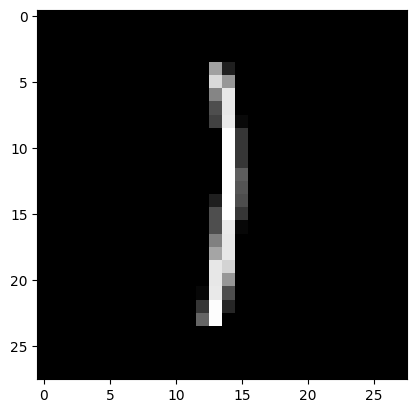

In [45]:
test(40)

1/1 [==============================] - 0s 21ms/step
Predicted Class: 6
Probability: 8.801764


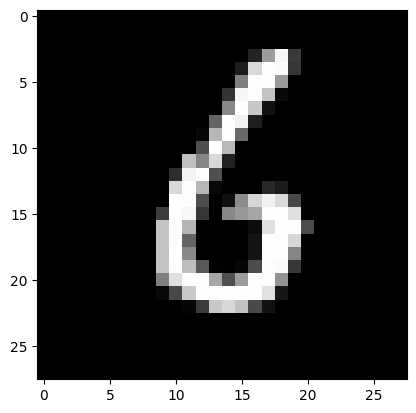

In [46]:
test(50)

## 8 - Save the model

In [48]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

model.save_weights("model_weights.h5")

In [50]:
model.save("model.keras")